<a href="https://colab.research.google.com/github/koushikpr/Machine-Learning-Prerequisites/blob/Neural-Networking/Neural_Networking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networking**

---



So Neural Networking is a method primarily used to classify data based on certain criteria. As far as we have learned, We have classified data existing in just raw without extra classification(one layer). To classify data existing in many layers, we tend to go deep(many layers). We use Deep Neural Networking when we are classifying data within many layers.

### How does it Work ?


Before we dive into any code lets break down how a neural network works and what it does.

![alt text](http://www.extremetech.com/wp-content/uploads/2015/07/NeuralNetwork.png)





So a neural network consists of 

1.   An Input Layer: consisting of all the inputs
2.   Hidden Layer: consisting of classifiers based on requirement
3.   Output Layer: Consisting of all predictable outputs
4.   Weights: A constant value that specifies the connection btw 2 nodes of 2 layers
5.   Bias: A constant value that exist specifically for every layer which provides linearity
6.   Activation Function: A function that converts data of every neuron, made up of higher dimension data to a suitable range for the the next layer. Some activation functions are :

- Relu (Rectified Linear Unit): Nullifies all -ve values

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent): Constraints the data btw -1 to +1

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid: Constraints the data btw 0 to 1

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)




The data at each subsequent neuron is defined as the following.
> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ stands for the weight of each connection to the neuron

> $x$ stands for the value of the connected neuron from the previous value

> $b$ stands for the bias at each layer, this is a constant

> $n$ is the number of connections

> $Y$ is the output of the current neuron

> $\sum$ stands for summation

Now since we have extracted the data of each layer, we wanna classify these layers based on certain conditions or funtions. Hence to obtain the output we define an Activation Function to perform these tasks.Once we give a predefined activation Function, we even give random weights and biases. Once we train the model, it will automatically reassign the accurate values of wieights and biases by a process called Back Propagation.

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$


**Loss/Cost Function**

This provides us a data abt how much the output has deviated from the original output.

Some errors we know are mean square error,mean absolute error, and hinge loss

### How to Determine the weights and biases:Gradient Descent

Gradient Descent is a function that traces back the path taken by every neuron creating an n-layer dimension matrix, which inturn solved to give us the most accurate values of weights and biases. 

**Optimizer**

Function that implements backpropagation like:
1. Gradient Descent
2. Stochastic Gradient Descent
3. Mini-Batch Gradient Descent
4. Momentum
5. Nesterov Accelerated Gradient


### Now Lets Finally Create our Neural Network From Scratch Using Keras

Step 1: Setup

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



Step 2: Loading the Dataset
So in the model we will be loading a pre-existing fashion MNIST Dataset from keras

In [ ]:
fmnist = keras.datasets.fashion_mnist
#loading the data into testing a training process
(train,trainlabels),(test,testlabels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train.shape


(60000, 28, 28)

In [ ]:
test.shape

(10000, 28, 28)

So there are 60000 training images of 28x28 pixels and  10000 training images of 28x28 pixels

Step 3: Providing class names

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Step 4: Previewing our images

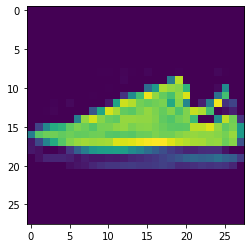

In [ ]:
plt.figure()
plt.imshow(train[6])


Step 5: Data Preprocessing

Each pixel of an image is represented by a grayscale number (0-255) where 0 is black and 255 is white. So to constraint all the values between 0 and 1 we divide the entire array by 255

In [ ]:
train = train/255.0
test = test/255.0

Step 6: Building the Model Using Keras

In [ ]:
model  = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(128,activation='relu'),
                           keras.layers.Dense(10,activation='softmax')
])

1. Layer 1: This is our input layer which is flatten and reshaped into a 28x28 array (784 neurons)
2. Layer 2: This is our only Hidden Layer which is dense(meaning connected to every neuron of the previous layer. There are 128 neurons in this layer and the activation function is rectify linear unit.
3. Layer 3: This is our Output layer which is also dense and is made of 10 neurons representing 10 classes that we have taken in this dataset. Activation function is softmax which returns the probability distribution of the output.

Step 7: Compiling this model 

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Step 8: Training the data using fit

In [ ]:
model.fit(train,trainlabels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4960 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3770 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3403 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3155 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2978 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2833 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2699 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2595 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2496 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

Step 9: Finding the Accuracy

In [ ]:
testl,testac = model.evaluate(test,testlabels,verbose=1)#verbose means
print(testac)

313/313 [==============================] - 4s 11ms/step - loss: 0.3278 - accuracy: 0.8863
0.8863000273704529


So now we see that the accuracy changes from 0.9093 to 0.8863 this is because the machine has seen the data many times(epoch) So it tends to remember the data. and when given new data it tends to get confused. This is called Overfitting

Step 10: Predicting 

Shirt


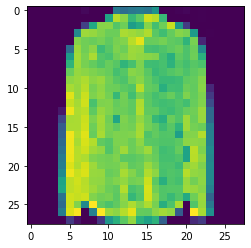

In [ ]:
pred = model.predict(test)
#image we want to find
imageno = 44
#every image has a 10 class probability distribution and we select the max using numpy
classno = np.argmax(pred[imageno])
print(class_names[classno])
plt.figure()
plt.imshow(test[imageno])